# Notebook visualising the before-after of the preprocessing of Breakout and Enduro

In [1]:
import torch
import gymnasium as gym
import matplotlib.pyplot as plt

import sys
sys.path.append("../../")

# Tetris

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]
/Users/Mac/anaconda3/envs/spesialpensum/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


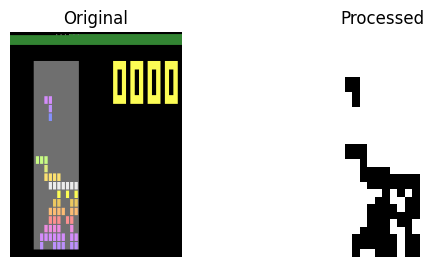

In [2]:
from tetris.DQN import VisionDeepQ as TetrisQ

agent = TetrisQ(
    network={
        "input_channels": 4, "outputs": 5,
        "channels": [128, 64],
        "kernels": [2, 2],
        "padding": ["valid", "valid"],
        "strides": [2, 1],
        "nodes": [128],
    },
    optimizer={
        "optimizer": torch.optim.RMSprop,
        "lr": 0.0001,
        "hyperparameters": {}
    },
    shape={
        "original": (1, 1, 210, 160),
        "height": slice(27, 203),
        "width": slice(22, 64)
    }
)
skip = 3

environment = gym.make('ALE/Tetris-v5', 
                       render_mode="rgb_array", obs_type="grayscale", 
                       frameskip=1, repeat_action_probability=0.0)

game = 0
done = False
initial = agent.preprocess(environment.reset()[0]).view((1, 1, *agent.shape["reshape"][2:]))
states = torch.cat([initial] * agent.shape["reshape"][1], dim=1)
pair = {
    "original": environment.render(),
    "processed": states[0,0]
}
while not done:
    game += 1
    _, states, _, done = agent.observe(environment, states, skip)

    if game == 180:
        pair = {
            "original": environment.render(),
            "processed": states[0,0]
        }
        
fig, axs = plt.subplots(1, 2)

axs[0].imshow(pair["original"])
axs[0].set_title("Original")
axs[0].axis("off")
axs[1].imshow(pair["processed"], cmap="binary")
axs[1].set_title("Processed")
axs[1].axis("off")

fig.tight_layout()
fig.subplots_adjust(top=0.5)
plt.savefig("tetris.png")
plt.show()

# Breakout

/Users/Mac/anaconda3/envs/spesialpensum/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


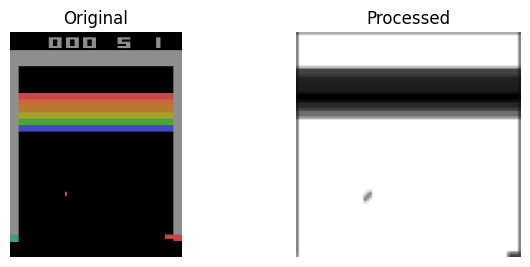

In [3]:
from breakout.DQN import VisionDeepQ as BreakoutQ

agent = BreakoutQ(
    network={
        "input_channels": 1, "outputs": 4,
        "channels": [32, 64, 64],
        "kernels": [8, 4, 3],
        "padding": ["valid", "valid", "valid"],
        "strides": [4, 2, 1],
        "nodes": [512],
    }, 
    optimizer={
        "optimizer": torch.optim.Adam,
        "lr": 1e-3
    }, 
    shape={
        "original": (1, 1, 210, 160),
        "height": slice(31, -17),
        "width": slice(7, -7),
    }
)
skip = 4

environment = gym.make('ALE/Breakout-v5', 
                       render_mode="rgb_array", obs_type="grayscale", 
                       frameskip=1, repeat_action_probability=0.0)

game = 0
done = False
states = torch.cat([agent.preprocess(environment.reset()[0])] * agent.shape["reshape"][1], dim=1)
pair = {
    "original": environment.render(),
    "processed": states[0,0]
}
while not done:
    game += 1
    _, states, _, done = agent.observe(environment, states, skip)

    if game == 10:
        pair = {
            "original": environment.render(),
            "processed": states[0,0]
        }
        
fig, axs = plt.subplots(1, 2)

axs[0].imshow(pair["original"])
axs[0].set_title("Original")
axs[0].axis("off")
axs[1].imshow(pair["processed"], cmap="binary")
axs[1].set_title("Processed")
axs[1].axis("off")

fig.tight_layout()
fig.subplots_adjust(top=0.5)
plt.savefig("breakout.png")
plt.show()

# Enduro

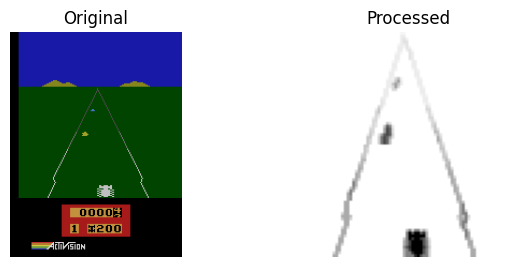

In [4]:
from enduro.DQN import VisionDeepQ as EnduroQ

agent = EnduroQ(
    network={
        "input_channels": 1, "outputs": 9,
        "channels": [32, 64, 64],
        "kernels": [8, 4, 3],
        "padding": ["valid", "valid", "valid"],
        "strides": [4, 2, 1],
        "nodes": [512],
    },
    optimizer={
        "optimizer": torch.optim.RMSprop,
        "lr": 0.0001
    },
    shape={
        "original": (1, 1, 210, 160),
        "height": slice(51, 155),
        "width": slice(8, 160)
    }
)
skip = 6

environment = gym.make('ALE/Enduro-v5', 
                       render_mode="rgb_array",  obs_type="grayscale", 
                       frameskip=1, repeat_action_probability=0.0)


game = 0
done = False
states = torch.cat([agent.preprocess(environment.reset()[0])] * agent.shape["reshape"][1], dim=1)
pair = {
    "original": environment.render(),
    "processed": states[0,0]
}
while not done:
    game += 1
    _, states, _, done = agent.observe(environment, states, skip)

    if game == 50:
        pair = {
            "original": environment.render(),
            "processed": states[0,0]
        }
        
fig, axs = plt.subplots(1, 2)

axs[0].imshow(pair["original"])
axs[0].set_title("Original")
axs[0].axis("off")
axs[1].imshow(pair["processed"], cmap="binary")
axs[1].set_title("Processed")
axs[1].axis("off")

fig.tight_layout()
fig.subplots_adjust(top=0.5)
plt.savefig("enduro.png")
plt.show()